In [13]:
#Import Turing, Distributionsm LinearAlgebra and DataFrames
using Turing, Distributions, LinearAlgebra, DataFrames

# Import MCMCChain, Plots, StatsPlots, GraphPlot, GraphRecipes and PyCall for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots, GraphPlot, GraphRecipes, PyCall, Statistics

# Set a seed for reproducibility.
using Random
Random.seed!(12);

# Turn off progress monitor.
Turing.turnprogress(false)

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/Turing.jl:24


false

In [14]:
# Set hyperparameters- K is the number of clusters and eta is the probability matrix between clusters 
K = 3
alpha = 0.1 * ones(K)
eta = Symmetric(rand(K,K))
# eta[diagind(eta)] .= 1
eta

3×3 Symmetric{Float64,Array{Float64,2}}:
 0.25851   0.434506  0.966361
 0.434506  0.96579   0.537265
 0.966361  0.537265  0.104797

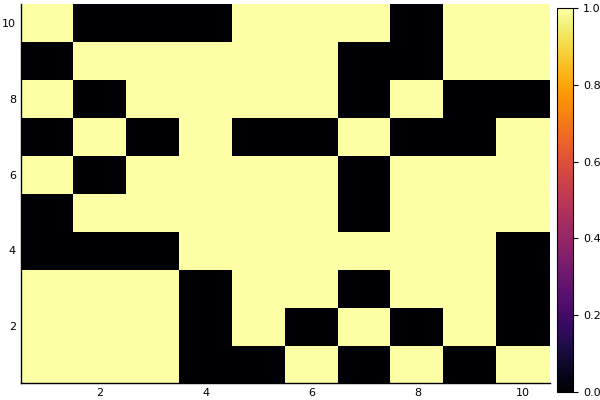

In [68]:
# Generate data using randomly generated cluster assignments
N = 10
clusters = rand(1:K, N)
graph = zeros(N,N)
for i=1:N
    graph[i, i] = 1
    for j = 1:i-1
        cluster_i = clusters[i]
        cluster_j = clusters[j]
        eta_ij = eta[cluster_i, cluster_j]
#         if(eta_ij > rand())
        if(rand(Binomial(1,eta_ij), 1)[1] == 1)
            graph[i, j] = 1
            graph[j, i] = 1
        end
    end
end
pyplot()
heatmap(graph)

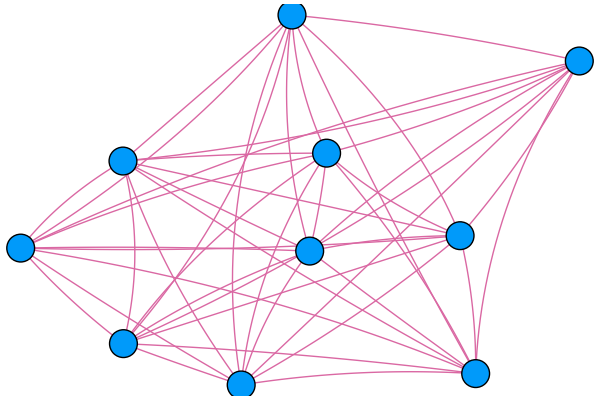

In [16]:
graphplot(graph)

In [71]:
# Define the model
@model mmsb(alpha, eta, graph, N) = begin
    pi = Vector{Vector}(undef, N)
    for n=1:N
        pi[n] ~ Dirichlet(alpha)
    end
    
    for n=1:N
        for m=1:n-1
#             z_nm ~ Categorical(pi[n])
#             z_mn ~ Categorical(pi[m])
#             graph[n, m] ~ Bernoulli(eta[z_nm, z_mn])
            graph[n, m] ~ Bernoulli((pi[n])'*eta*pi[m])
        end
    end
end;

In [97]:
# This is temporary while the reverse differentiation backend is being improved.
Turing.setadbackend(:forward_diff)

# Sample using HMC
# chains = mapreduce(c -> sample(poisson_regression(data, data_labels, n, 10), NUTS(2500, 200, 0.65) ), chainscat, 1:num_chains);
# g = Gibbs(4000, PG(20, 1, :z_nm, :z_mn, :pi))
# g = Gibbs(100000, HMC(2, 0.001, 7, :pi), PG(20, 1, :z_nm, :z_mn))
chain = sample(mmsb(alpha, eta, graph, N), HMC(100000, 0.05, 10) )
# chain = sample(mmsb(alpha, eta, graph, N), HMC(50000, 200, 0.65) )
# chain = sample(mmsb(alpha, eta, graph, N), g)

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, NaN, NaN, NaN, NaN, NaN, Inf, -Inf, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:170
┌ Warning: Numerical error in gradients. Rejecting current proposal...
└ @ Turing.Core /home/saumya-shah/.julia/packages/Turing/RZOZ8/src/core/ad.jl:169
┌ Warning: grad = Real[NaN, N

DomainError: DomainError with -2.220446049250313e-16:
log will only return a complex result if called with a complex argument. Try log(Complex(x)).

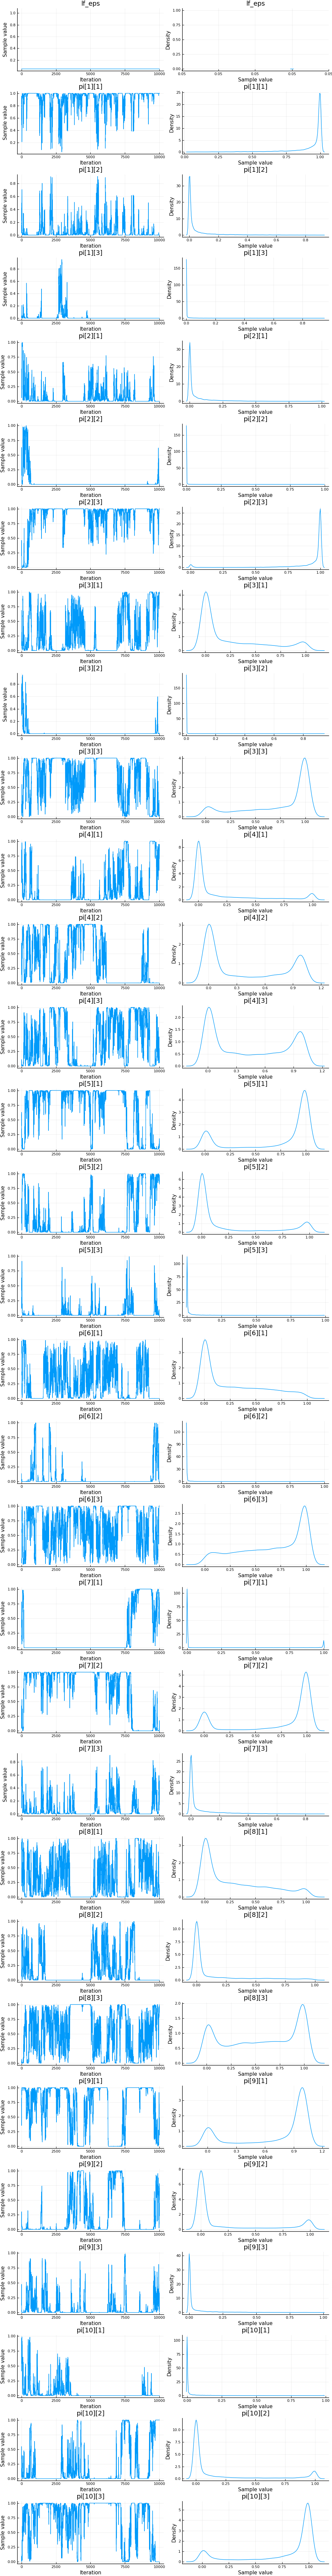

┌ Warning: No strict ticks found
└ @ PlotUtils /home/saumya-shah/.julia/packages/PlotUtils/35TGG/src/ticks.jl:173


In [98]:
plot(chain)

In [100]:
# Find the predicted clusters using the new parameters
clusters_pred = Array{Int64}(undef, N)
df = DataFrame(chain[:pi])
means = colwise(mean, df)
count = 1
i = 1

#Finding the index of the max value in each interval of size K (which represents the probabilities for each node) to get the predicted cluster assignments
max = means[1]
for mean in means
    if(mean >= max)
        clusters_pred[i] = count
        max = mean
    end
    count += 1
    if(count == K + 1)
        count = 1
        max = -Inf
        i += 1
    end
end
clusters_pred - clusters

┌ Warning: `colwise(f, d::AbstractDataFrame)` is deprecated, use `[f(col) for col = eachcol(d)]` instead.
│   caller = top-level scope at In[100]:4
└ @ Core In[100]:4


10-element Array{Int64,1}:
 -2
  2
  1
  1
 -1
  1
 -1
  1
 -2
  2

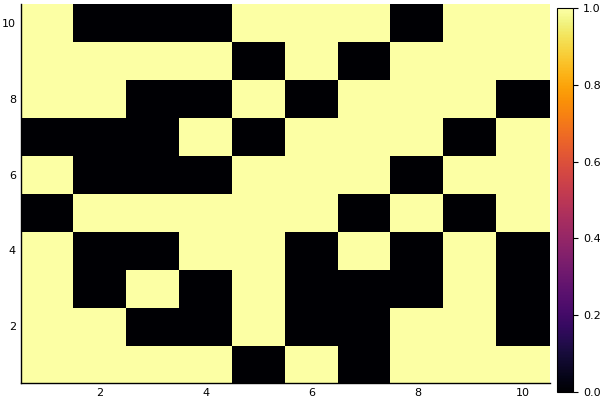

In [101]:
#Reconstructing the predicted graph using predicted cluster assignments
clusters
graph_pred = zeros(N,N)
for i=1:N
    graph_pred[i, i] = 1
    for j = 1:i-1
        cluster_i = clusters_pred[i] 
        cluster_j = clusters_pred[j]
        eta_ij = eta[cluster_i, cluster_j]
        if(rand(Binomial(1,eta_ij), 1)[1] == 1)
            graph_pred[i, j] = 1
            graph_pred[j, i] = 1
        end
    end
end
heatmap(graph_pred)

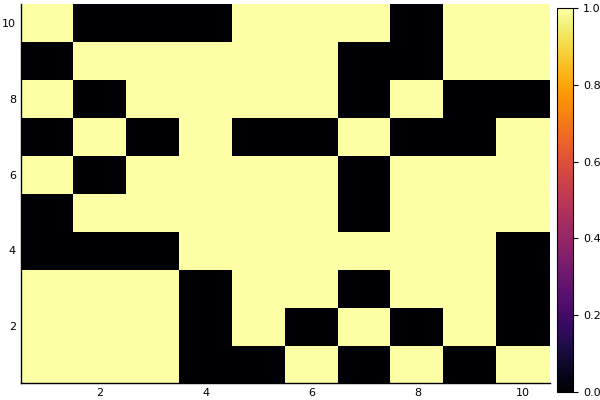

In [102]:
heatmap(graph)

In [103]:
graph_diff = graph - graph_pred
# count(i->(i!=0), graph_diff, dims = 1)
non_zero = 0
for row in graph_diff
    for ele in row
        if(ele != 0)
            non_zero += 1
        end
    end
end
non_zero, size(graph_diff)
# size(graph_diff)

(28, (10, 10))